In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats

## Probability by Conditioning ##

The theory in this section isn't new. It's the old familiar multiplication rule. We are just going to use it in the context of processes indexed by time, in a method that we are going to call *conditioning on early moves*.

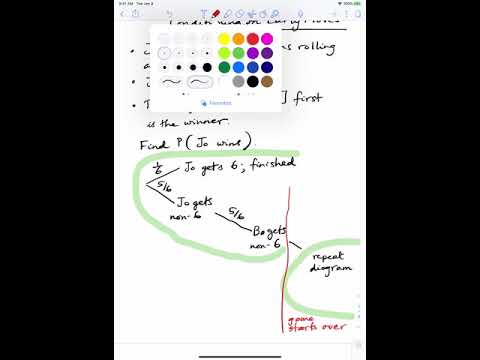

In [2]:
# VIDEO: Conditioning on Early Moves
from IPython.display import YouTubeVideo
YouTubeVideo('BCx-DlphihU')

### Winning a Game of Dice ###
Suppose Jo and Bo play the following game. Jo rolls a die, then Bo rolls it, then Jo rolls again, and so on, until the first time one of them gets the face with six spots. That person is the winner.

**Question.** What is the chance that Jo wins?

**Answer.** Before you do any calculations, notice that the game isn't symmetric in the two players. Jo has the advantage of going first, and could win on the first roll. So the probability that Jo wins should be greater than half.

To see exactly what it is, notice that there's a natural recursion or "renewal" in the setup. For Jo to win, we can *condition on the first two moves* as follows:
- either Jo wins on Roll 1;
- or Jo gets a non-six on Roll 1, then Bo gets a non-six on Roll 2, and then *the game starts over* and Jo wins.

So at Time 0 (that is, before the dice are rolled), let $x$ be the chance that Jo is the winner. Then $x$ satisfies an equation:

$$
x = \frac{1}{6} + \big{(}\frac{5}{6}\big{)}^2 x
$$

This is easy to solve.

$$
\frac{11}{36}x ~ = ~ \frac{6}{36} ~~~~ \text{and so } ~~~~ x = \frac{6}{11}
$$

which is greater than half as we had guessed.

```{admonition} Quick Check
I have a coin that lands heads with chance $1/3$, and you have a fair coin. We take turns tossing our coins until one of us gets a head; that person is the winner. Since my coin is less likely than yours to land heads, I get to toss first. 

Let $x$ be the chance that I am the winner. 

(a) Find an equation for $x$ by conditioning on the first two tosses.

(b) Solve the equation to find the chance that I am the winner.

```

```{admonition} Answer
:class: dropdown
(a) $x = \frac{1}{3} + \frac{2}{3}\cdot\frac{1}{2}x$

(b) $x = \frac{1}{2}$

```

### Gambler's Ruin: Fair Coin ###
Let $a$ and $b$ be two positive integers. Suppose a gambler starts with $a$ dollars and bets on the tosses of a coin. Every time the coin lands heads, the gambler wins a dollar. Every time it lands tails, the gambler loses a dollar. 

Now suppose the gambler has a *stopping rule*: he will stop once his net gain is $b$ dollars or he has no money left, whichever happens first. If the gambler ends up when has no money, he is ruined. Our goal in this example is to find the probability that the gambler is ruined.

At each toss we will keep track of the gambler's net gain. So he will start out at 0 and stop when the he gets to $b$ or $-a$, whichever happens first.

It's a good idea to start visualizing the random trajectory of the gambler's net gain as a *path*. Here are two graphs that assume $a = 3$ and $b = 7$. The first graph shows a path that leads to the gambler reaching a net gain of $\\$b$. The second shows a path to ruin.

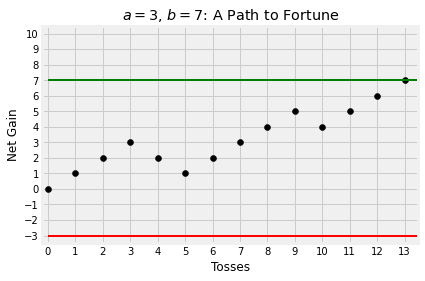

In [3]:
# NO CODE
a = 3
b = 7
tosses = make_array(1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1)
fortune = np.cumsum(np.append(0, tosses))
plt.scatter(np.arange(14), fortune, color='k')
plt.plot([0, 13.5], [-1*a, -1*a], lw=2, color='r')
plt.plot([0, 13.5], [b, b], lw=2, color='g')
plt.ylim(-3.5, 10.5)
plt.xlim(-0.2, 13.5)
plt.xticks(np.arange(0, 14, 1))
plt.yticks(np.arange(-3, 11))
plt.xlabel('Tosses')
plt.ylabel('Net Gain')
plt.title('$a = 3$, $b = 7$: A Path to Fortune');

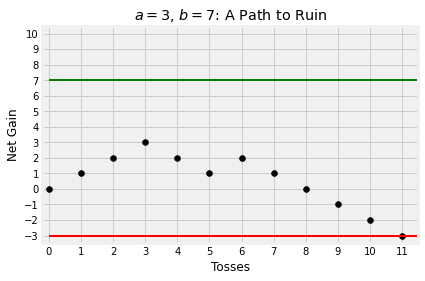

In [4]:
# NO CODE
a = 3
b = 7
tosses = make_array(1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1)
fortune = np.cumsum(np.append(0, tosses))
plt.scatter(np.arange(12), fortune, color='k')
plt.plot([0, 11.5], [-1*a, -1*a], lw=2, color='r')
plt.plot([0, 11.5], [b, b], lw=2, color='g')
plt.ylim(-3.5, 10.5)
plt.xlim(-0.2, 11.5)
plt.xlabel('Tosses')
plt.ylabel('Net Gain')
plt.xticks(np.arange(0, 12, 1))
plt.yticks(np.arange(-3, 11))
plt.title('$a = 3$, $b = 7$: A Path to Ruin');

**Question.** What is the probability that the gambler is ruined?

**Answer.** You can see from the paths above that at the first step the gambler's net gain will be either -1 or 1, and then we will have to work out the probability of ruin from that point.

For any $k$, let $p_k$ be the chance that the gambler is ruined given that he starts with a net gain of $k$ dollars. 

The chance that we are looking for is $p_0$. 

By *conditioning on the first move*, we can see that $p_k$ satisfies an equation:

$$ 
p_k = \frac{1}{2}p_{k-1} + \frac{1}{2}p_{k+1}, ~~~~ -a+1 \le k \le b-1
$$

with the "edge cases" defined as

$$
p_{-a} = 1 ~~~~~ \text{and} ~~~~~ p_b = 0
$$

Write the left hand side of the equation as $\frac{1}{2}p_k + \frac{1}{2}p_k$ and rearrange it to see that 

$$
p_k - p_{k-1} = p_{k+1} - p_k
$$

The successive differences are equal, which means that $p_k$ is a linear function of $k$.

Here is the line assuming $a= 3$ and $b = 7$ as before. The red lines show that $p_0 = 0.7$.

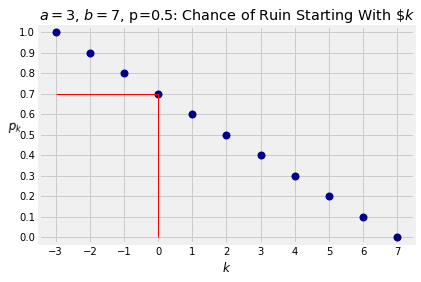

In [5]:
# NO CODE
a = 3
b = 7
plt.scatter(np.arange(-3, 8, 1), np.arange(1, -0.1, -0.1), lw=2, color='darkblue')
plt.plot([0, 0], [0, 0.7], lw=1, color='r')
plt.plot([-3, 0], [0.7, 0.7], lw=1, color='r')
plt.ylim(-0.03, 1.03)
plt.xticks(np.arange(-3, 8))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('$k$')
plt.ylabel('$p_k$', rotation=2)
plt.title('$a=3$, $b=7$, p=0.5: Chance of Ruin Starting With $\$k$');

For general $a$ and $b$, the line starts at $(-a, 1)$ and has slope $-1/(a+b)$. So
the chance of ruin is

$$
p_0 ~ = ~ 1 - \frac{a}{a+b} ~ = ~  \frac{b}{a+b}
$$

The chance that the gambler ends up gaining $b$ dollars is

$$
1 - p_0 = \frac{a}{a+b}
$$

For fixed $a$, this is a decreasing function of $b$. That makes sense. For fixed $a$, the larger $b$ is, the harder it is for the gambler to end up making $b$ dollars.

### Gambler's Ruin: Unfair Coin ###
If the gambler bets on tosses of a coin that lands heads with $p \ne 1/2$, then the equations become

$$
p_k = q\cdot p_{k-1} + p\cdot p_{k+1}, ~~~~ -a+1 \le k \le b-1
$$

where $q = 1-p$, and the edge cases are 

$$
p_{-a} = 1 ~~~~~ \text{and} ~~~~~ p_b = 0
$$

as before. Now the rearrangement is

$$
q(p_k - p_{k-1}) = p(p_{k+1} - p_k)
$$

which means that the ratio of the successive differences is constant and equal to $r = \frac{q}{p}$. So the probabilities $p_k$ are the sums of the terms in a geometric progression with common ratio $r$. You can check that this works out to

$$
p_k = \frac{r^{a+k} - r^{a+b}}{1 - r^{a+b}}, ~~~~~ -a \le k \le b
$$

and therefore the chance of ruin is

$$
p_0 ~ =  ~ \frac{r^a - r^{a+b}}{1 - r^{a+b}}
$$

Note that if $p < 1/2$ then $r > 1$ and both the numerator and denominator are negative.

Here is a graph of the ruin probabilities, for $a = 3$ and $b = 10$ as before, but now with a coin that is biased towards heads with $p = 0.6$. Not surprisingly, as the initial fortune increases the probability of ruin falls more sharply for this coin than for the fair coin. Even when the gambler starts with only $\\$3$, his chance of ruin is less than 30%.

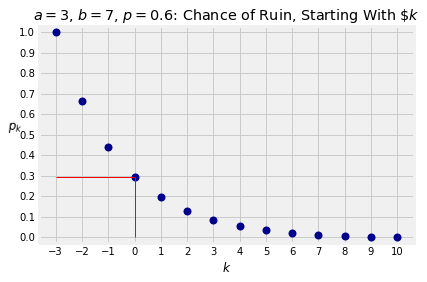

In [6]:
# NO CODE
a = 3
b = 10
p = 0.6
r = (1-p)/p
k = np.arange(-1*a, b+1)
ruin_probs = (r**(a+k) - r**(a+b))/(1 - r**(a+b))
p3 = ruin_probs.item(3)
plt.scatter(k, ruin_probs, lw=2, color='darkblue')
plt.plot([0, 0], [0, p3], lw=1, color='r')
plt.plot([-1*a, 0], [p3, p3], lw=1, color='r')
plt.ylim(-0.03, 1.03)
plt.xticks(np.arange(-1*a, b+1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('$k$')
plt.ylabel('$p_k$', rotation=2)
plt.title('$a=3$, $b=7$, $p=0.6$: Chance of Ruin, Starting With $\$k$');